In [1]:
import pandas as pd

data = pd.read_csv('Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
'''
clean twitter text
'''
import re
import numpy as np

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

data['text'] = np.array([clean_tweet(tweet) for tweet in data['text']])
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,What said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus you ve added commercials to the experienc...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,I didn t today Must mean I need to take anothe...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,it s really aggressive to blast obnoxious ente...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,and it s a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
pos_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['airline_sentiment'][index] == 'positive']
neu_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['airline_sentiment'][index] == 'neutral']
neg_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['airline_sentiment'][index] == 'negative']
# pos_tweets[0]

'plus you ve added commercials to the experience tacky'

In [35]:
# data process
import string
import nltk
from nltk.tokenize import *
from nltk.corpus import stopwords
from nltk import FreqDist

pos_tweets_list = []
neu_tweets_list = []
neg_tweets_list = []

# raw = pos_tweets[0]
# tokens=word_tokenize(raw)
# tokens

def cleaned_list_func(tweet):
    '''
    lemmatization and remove stop words
    '''
    new_text = []
    tokens=word_tokenize(tweet)
    for word in tokens:
        lemmatizer = nltk.WordNetLemmatizer()
        new_word = lemmatizer.lemmatize(word)
        if len(new_word) > 3 and new_word not in string.punctuation and new_word.lower() not in stopwords.words('english'):
            new_text.append(new_word.lower())
    return new_text

for tweet in pos_tweets:
    pos_tweets_list.append(cleaned_list_func(tweet))

for tweet in neu_tweets:
    neu_tweets_list.append(cleaned_list_func(tweet))
    
for tweet in neg_tweets:
    neg_tweets_list.append(cleaned_list_func(tweet))

# pos_tweets_list[0]
# neu_tweets_list[0]
# neg_tweets_list[0]

In [36]:
import collections

def word_count(docs,num=20):
    '''
    extract high frequency words
    '''
    words_dump = []
    for text in docs:
        words_dump = words_dump + text
    res = collections.Counter(words_dump).most_common(num)
    return res

pos_word_count = word_count(pos_tweets_list)
neu_word_count = word_count(neu_tweets_list)
neg_word_count = word_count(neg_tweets_list)

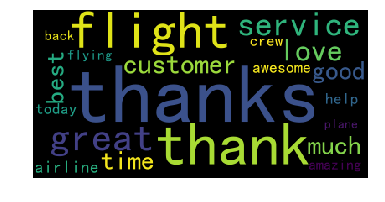

In [37]:
# plot word cloud
import wordcloud
import matplotlib.pyplot as plt

# mask = np.array(Image.open('wordcloud.jpg')) 
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf', 
#     mask=mask, 
    max_words=200, 
    max_font_size=100 
)

# pos_word_count
wc.generate_from_frequencies(dict(pos_word_count)) 
# image_colors = wordcloud.ImageColorGenerator(mask) 
# wc.recolor(color_func=image_colors)
plt.imshow(wc) 
plt.axis('off') 
plt.show() 

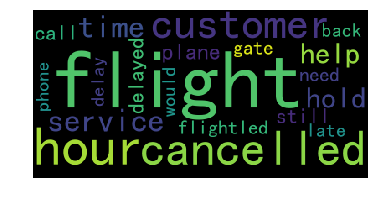

In [38]:
wc.generate_from_frequencies(dict(neg_word_count)) 
plt.imshow(wc) 
plt.axis('off') 
plt.show()